## Text Data - Sentiment Analysis


### SPRINT 1 - Create DataFrame from raw text files

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import os
import zipfile

### Extract the zip file

In [4]:
%%time
zip_file_path=r'C:\Users\user\Downloads\txt_reviews.zip'
extract_path=r'C:\Users\user\Downloads\txt_reviews1'

with zipfile.ZipFile (zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

CPU times: total: 11min 34s
Wall time: 10h 42min 6s


#### Walk through the folder

In [6]:
%%time
import os

def read_text_files(extract_path):
    ProductId=[]
    UserId=[]
    ProfileName=[]
    HelpfulnessNumerator=[]
    HelpfulnessDenominator=[]
    Score=[]
    Time=[]
    ReviewSummary=[]
    ReviewText=[]

    for root, dirs, files in os.walk(extract_path):
        for file_name in files:
            if file_name.endswith(".txt"):
                file_path = os.path.join(root, file_name)
                try:
                    with open(file_path, "r") as f:
                        lines = f.readlines()
                        if len(lines) >= 9:  # Ensure there are at least 9 lines
                            ProductId.append(lines[0].split(':')[1].strip())
                            UserId.append(lines[1].split(':')[1].strip())
                            ProfileName.append(lines[2].split(':')[1].strip())
                            HelpfulnessNumerator.append(lines[3].split(':')[1].strip())
                            HelpfulnessDenominator.append(lines[4].split(':')[1].strip())
                            Score.append(lines[5].split(':')[1].strip())
                            Time.append(lines[6].split(':')[1].strip())
                            ReviewSummary.append(lines[7].split(':')[1].strip())
                            ReviewText.append(lines[8].split(':')[1].strip())
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

    return ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, ReviewSummary, ReviewText


extract_path = r'C:\Users\user\Downloads\txt_reviews1'
ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, ReviewSummary, ReviewText = read_text_files(extract_path)

print(f"Number of reviews read: {len(ProductId)}")


Error reading file C:\Users\user\Downloads\txt_reviews1\txt_reviews\review_53891.txt: 'charmap' codec can't decode byte 0x9d in position 190: character maps to <undefined>
Number of reviews read: 568453
CPU times: total: 8min 32s
Wall time: 2h 56min 39s


#### Createing a data frame

In [8]:
def load_into_df(ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText):
    df = pd.DataFrame({"ProductId":ProductId,
                       "UserId":UserId,
                       "ProfileName":ProfileName,
                       "HelpfulnessNumerator":HelpfulnessNumerator,
                       "HelpfulnessDenominator":HelpfulnessDenominator,
                       "Score":Score,
                       "Time":Time,
                       "ReviewSummary":ReviewSummary,
                       "ReviewText":ReviewText})
    return df

In [10]:
%%time
df=load_into_df(ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText)

CPU times: total: 1 s
Wall time: 3.64 s


In [12]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568453 entries, 0 to 568452
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568453 non-null  object
 1   UserId                  568453 non-null  object
 2   ProfileName             568453 non-null  object
 3   HelpfulnessNumerator    568453 non-null  object
 4   HelpfulnessDenominator  568453 non-null  object
 5   Score                   568453 non-null  object
 6   Time                    568453 non-null  object
 7   ReviewSummary           568453 non-null  object
 8   ReviewText              568453 non-null  object
dtypes: object(9)
memory usage: 39.0+ MB


In [16]:
%%time
df["HelpfulnessNumerator"]=df['HelpfulnessNumerator'].astype('int')

CPU times: total: 62.5 ms
Wall time: 124 ms


In [18]:
df["HelpfulnessDenominator"]=df['HelpfulnessDenominator'].astype('int')

In [20]:
df['Score']=df['Score'].astype('int')

In [22]:
df['Time']=df['Time'].astype('int')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568453 entries, 0 to 568452
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568453 non-null  object
 1   UserId                  568453 non-null  object
 2   ProfileName             568453 non-null  object
 3   HelpfulnessNumerator    568453 non-null  int32 
 4   HelpfulnessDenominator  568453 non-null  int32 
 5   Score                   568453 non-null  int32 
 6   Time                    568453 non-null  int32 
 7   ReviewSummary           568453 non-null  object
 8   ReviewText              568453 non-null  object
dtypes: int32(4), object(5)
memory usage: 30.4+ MB


In [26]:
df.to_csv('Sentiment_analysis.csv')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

### Step-1 Load the Data

In [5]:
df=pd.read_csv(r'C:\Users\user\Downloads\Sentiment_analysis.csv')

In [7]:
df.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [9]:
df.drop(columns='Unnamed: 0',inplace=True)

In [11]:
df['Helpfulness']=df['HelpfulnessNumerator']/df['HelpfulnessDenominator']

In [13]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,NaN
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,0.0
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568453 entries, 0 to 568452
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568453 non-null  object 
 1   UserId                  568453 non-null  object 
 2   ProfileName             568403 non-null  object 
 3   HelpfulnessNumerator    568453 non-null  int64  
 4   HelpfulnessDenominator  568453 non-null  int64  
 5   Score                   568453 non-null  int64  
 6   Time                    568453 non-null  int64  
 7   ReviewSummary           568378 non-null  object 
 8   ReviewText              568436 non-null  object 
 9   Helpfulness             298401 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 43.4+ MB


In [17]:
df[df['ReviewText'].isna()==True]

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
65859,B0021H0BXG,AD4QJRYAXIR0W,"Nozama ""Emirp""",0,0,4,1347148800,Above & BEEyond,NaN,NaN
104842,B002LMGV0S,AD4QJRYAXIR0W,"Nozama ""Emirp""",0,0,4,1347148800,Above & BEEyond,NaN,NaN
165546,B001CZ6CFY,A354AY83WZ2RLB,"S. fogarty ""Shaun""",1,5,5,1268092800,Costco fixed a problem!,NaN,0.20
174659,B002TSA91Q,A2D6Q5FLVYC4CP,B,2,4,5,1328918400,UPDATED,NaN,0.50
174982,B002TSA91G,A2D6Q5FLVYC4CP,B,2,4,5,1328918400,UPDATED,NaN,0.50
199188,B000FD9314,A170EOCWWXBLF5,zzzed,1,1,5,1163980800,delicious,NaN,1.00
224244,B000CQE3O6,A170EOCWWXBLF5,zzzed,9,9,5,1157068800,"light pleasing flavor, good price",NaN,1.00
231964,B001EO5RF4,A170EOCWWXBLF5,zzzed,40,40,5,1156291200,woah baby,NaN,1.00
237547,B004TEXC7G,A1KEIIW32S1EJ8,Sarah777,1,4,1,1305417600,bad bad bad,NaN,0.25
354320,B0021J6CFK,AD4QJRYAXIR0W,"Nozama ""Emirp""",0,0,4,1347148800,Above & BEEyond,NaN,NaN


In [19]:
df['Helpfulness'].fillna(0,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11780\2051050905.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Helpfulness'].fillna(0,inplace=True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568453 entries, 0 to 568452
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568453 non-null  object 
 1   UserId                  568453 non-null  object 
 2   ProfileName             568403 non-null  object 
 3   HelpfulnessNumerator    568453 non-null  int64  
 4   HelpfulnessDenominator  568453 non-null  int64  
 5   Score                   568453 non-null  int64  
 6   Time                    568453 non-null  int64  
 7   ReviewSummary           568378 non-null  object 
 8   ReviewText              568436 non-null  object 
 9   Helpfulness             568453 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 43.4+ MB


In [23]:
def score_review(score):
    if score==4 or score==5:
        return "Positive"
    elif score==3:
        return "Neutral"
    else:
        return "Negative"

In [25]:
df['Sentiment']=df['Score'].apply(score_review)

In [27]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,Sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,Positive
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0,Positive
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,0.0,Negative
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4,Negative
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0,Positive


In [29]:
df.isna().sum()

ProductId                  0
UserId                     0
ProfileName               50
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
ReviewSummary             75
ReviewText                17
Helpfulness                0
Sentiment                  0
dtype: int64

In [31]:
df['ProfileName'].fillna(' ',inplace=True)
df['ReviewSummary'].fillna(' ',inplace=True)
df["ReviewText"].fillna(' ',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11780\3033107942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ProfileName'].fillna(' ',inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11780\3033107942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568453 entries, 0 to 568452
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568453 non-null  object 
 1   UserId                  568453 non-null  object 
 2   ProfileName             568453 non-null  object 
 3   HelpfulnessNumerator    568453 non-null  int64  
 4   HelpfulnessDenominator  568453 non-null  int64  
 5   Score                   568453 non-null  int64  
 6   Time                    568453 non-null  int64  
 7   ReviewSummary           568453 non-null  object 
 8   ReviewText              568453 non-null  object 
 9   Helpfulness             568453 non-null  float64
 10  Sentiment               568453 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 47.7+ MB


## 1. Show me some nice analysis on the given data.

### Step-2  Exploratory Data Analysis

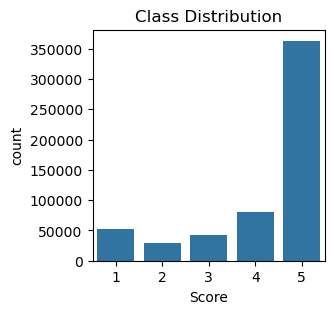

In [39]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Class Distribution")
sns.countplot(data=df, x='Score')

plt.show()

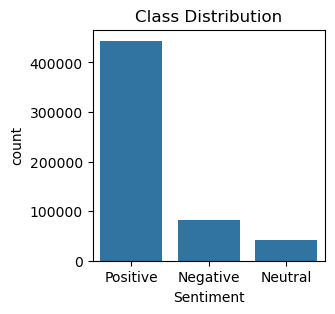

In [41]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Class Distribution")
sns.countplot(data=df, x='Sentiment')

plt.show()

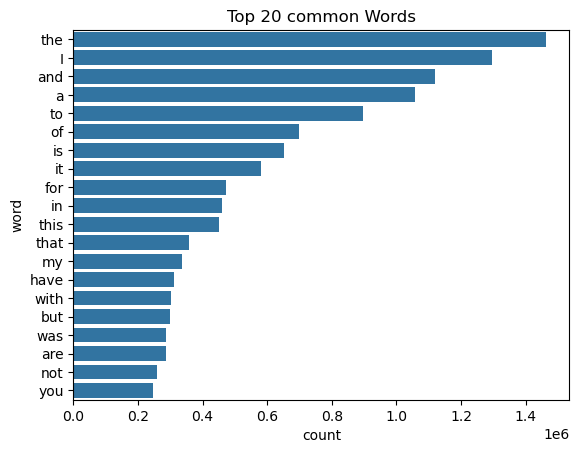

In [36]:
from collections import Counter
all_words = " ".join(df['ReviewText'].values).split()
word_counts=Counter(all_words)
common_words=word_counts.most_common(20)

most_common_df=pd.DataFrame(common_words,columns=['word','count'])

sns.barplot(data=most_common_df,y='word',x='count')
plt.title("Top 20 common Words")
plt.show()

From the above bar plot we can observe that 'the, I, and, a, to, of, is, it, for, in this, that, my, have, with, but, was, are, not, you' etc. We need to remove these stop words.

In [43]:
! pip install wordcloud

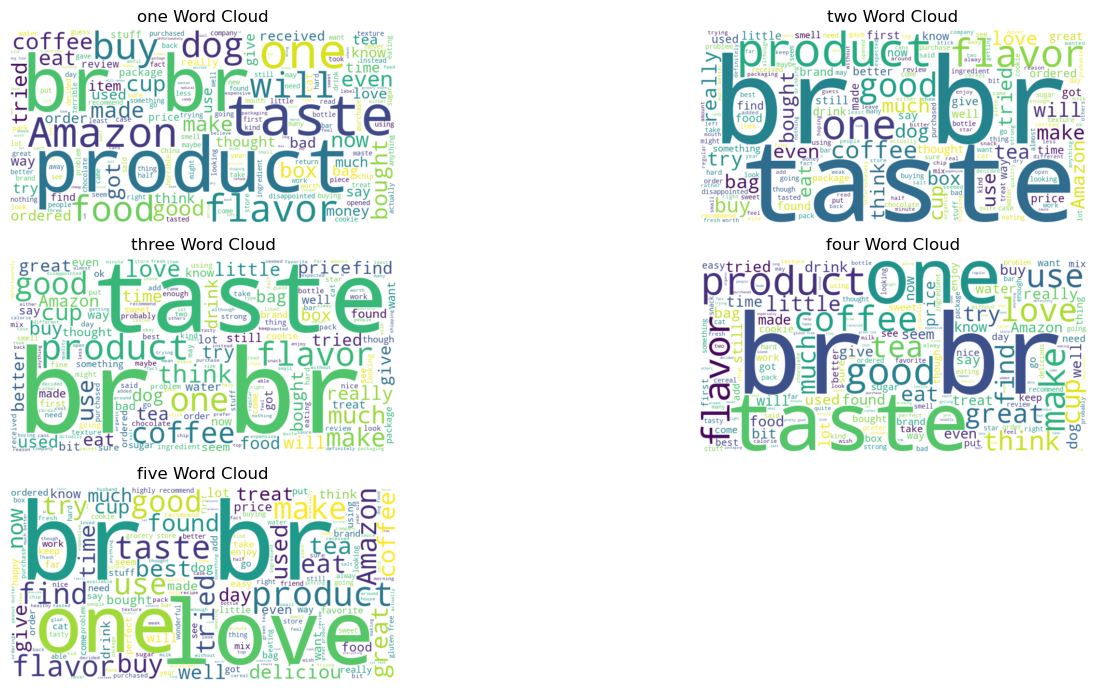

CPU times: total: 1min 58s
Wall time: 2min 2s


In [45]:
%%time
from wordcloud import WordCloud



one_review = " ".join(df[df['Score'] == 1]['ReviewText'].values)
one_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(one_review)

two_review = " ".join(df[df['Score'] == 2]['ReviewText'].values)
two_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(two_review)

three_review = " ".join(df[df['Score'] == 3]['ReviewText'].values)
three_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(three_review)

four_review = " ".join(df[df['Score'] == 4]['ReviewText'].values)
four_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(four_review)

five_review = " ".join(df[df['Score'] == 5]['ReviewText'].values)
five_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(five_review)



# Display the word clouds
fig, ax = plt.subplots(3, 2, figsize=(15, 7))
ax = ax.flatten()

ax[0].imshow(one_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('one Word Cloud')

ax[1].imshow(two_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('two Word Cloud')

ax[2].imshow(three_wordcloud, interpolation='bilinear')
ax[2].axis('off')
ax[2].set_title('three Word Cloud')

ax[3].imshow(four_wordcloud, interpolation='bilinear')
ax[3].axis('off')
ax[3].set_title('four Word Cloud')

ax[4].imshow(five_wordcloud, interpolation='bilinear')
ax[4].axis('off')
ax[4].set_title('five Word Cloud')

fig.delaxes(ax[5])

plt.tight_layout()

plt.show()

In [47]:
y = df["Sentiment"]
X = df[['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'ReviewSummary',
       'ReviewText', 'Helpfulness']]

In [49]:
df.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'ReviewSummary',
       'ReviewText', 'Helpfulness', 'Sentiment'],
      dtype='object')

In [51]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(454762, 10) (454762,)
(113691, 10) (113691,)


In [53]:
pip install nltk scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [55]:
import nltk
# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Initialize stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Clean text function
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\d', ' ', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    return text

# Preprocess function
def preprocess(text):
    text = clean_text(text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]  # Only lemmatize
    return ' '.join(words)

# Assuming df is already defined and contains 'ReviewText' column
df['processed_text'] = df['ReviewText'].apply(preprocess)
print(df['processed_text'])

0         bought several vitality canned dog food produc...
1         healthy dog food good digestion also good smal...
2         fed golden retriever hated eat gave terrible d...
3         admit sucker large quantity oz shopping hot sa...
4         week old gas constipation problem first week t...
                                ...                        
568448                 love noodle little spicy wife perfct
568449                   love buy another box done last one
568450              late father law used rating system meal
568451    favorite brand korean ramen spicy used eating ...
568452    like noodle although say spicy somewhat unders...
Name: processed_text, Length: 568453, dtype: object


In [59]:
!pip install tqdm

In [61]:
from tqdm import tqdm
import pandas as pd

# Define the clean function
def clean(doc):
    # Example cleaning steps:
    # Convert to lowercase
    cleaned_doc = doc.lower()
    # Remove punctuation (you can add more cleaning steps as needed)
    cleaned_doc = ''.join(char for char in cleaned_doc if char.isalnum() or char.isspace())
    return cleaned_doc

# Register `pandas.progress_apply` with `tqdm`
tqdm.pandas()

# Use `progress_apply` instead of `apply`
X_train['processed_text'] = X_train['ReviewText'].progress_apply(lambda doc: clean(doc))

# Display the DataFrame
print(X_train.head())


100%|███████████████████████████████████████████████████████████████████████| 454762/454762 [00:38<00:00, 11829.92it/s]

         ProductId          UserId    ProfileName  HelpfulnessNumerator  \
438035  B000IHNCQO   AN794NU9H516J  L. A. Woodall                     0   
136837  B000HDI5OS   AJSY7O99FJ6G6       Bamjoker                     3   
37385   B000LRH9GK  A15RO5PRZ0VR19       Wing-nut                     1   
151022  B00430B1VK  A2E5ZIM0PUU1Y1        Michael                     2   
391724  B0032GHKXO   AA6JVHUM32ZDB        T. Yang                     1   

        HelpfulnessDenominator  Score        Time  \
438035                       0      5  1341360000   
136837                       3      4  1297382400   
37385                        1      5  1200009600   
151022                       2      5  1324598400   
391724                       1      4  1304899200   

                               ReviewSummary  \
438035       Crunchy cheesy and yet low carb   
136837               Quality organic pie mix   
37385                      Delectable Flavor   
151022                               I

In [63]:
from tqdm import tqdm, tqdm_notebook

# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
X_train['processed_text'] = X_train['ReviewText'].progress_apply(lambda doc: clean(doc))

X_train.head()

100%|███████████████████████████████████████████████████████████████████████| 454762/454762 [00:23<00:00, 19635.00it/s]


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,processed_text
438035,B000IHNCQO,AN794NU9H516J,L. A. Woodall,0,0,5,1341360000,Crunchy cheesy and yet low carb,I miss crackers and chips since joining the ke...,0.0,i miss crackers and chips since joining the ke...
136837,B000HDI5OS,AJSY7O99FJ6G6,Bamjoker,3,3,4,1297382400,Quality organic pie mix,"The product is very good, it has a nice spiced...",1.0,the product is very good it has a nice spiced ...
37385,B000LRH9GK,A15RO5PRZ0VR19,Wing-nut,1,1,5,1200009600,Delectable Flavor,This is a delectable sweet pepper sauce. It i...,1.0,this is a delectable sweet pepper sauce it is...
151022,B00430B1VK,A2E5ZIM0PUU1Y1,Michael,2,2,5,1324598400,Its hot,I bought this product as a Christmas gift. My...,1.0,i bought this product as a christmas gift my ...
391724,B0032GHKXO,AA6JVHUM32ZDB,T. Yang,1,1,4,1304899200,I used to absolutely love this!-EDIT,"(Update on May 22, 2012) I used to absolutely ...",1.0,update on may 22 2012 i used to absolutely lov...


In [65]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
X_test['processed_text'] = X_test['ReviewText'].progress_apply(lambda doc: clean(doc))

X_test.head()

100%|███████████████████████████████████████████████████████████████████████| 113691/113691 [00:09<00:00, 12128.23it/s]


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,processed_text
165254,B004IN43VC,A33BHREBPT8CJI,ShilohF,0,0,3,1339459200,Not overly thrilled with the flavor.,I eat a bran muffin for breakfast every day. I...,0.0,i eat a bran muffin for breakfast every day i ...
356328,B000NP30V8,A2XFS4Q6I07N2B,GlobalAMP,0,0,5,1350086400,best k-cups you can get,i love super strong coffee and i've been using...,0.0,i love super strong coffee and ive been using ...
427943,B003P9XGF4,A2XRK3DN2CTY77,"Wanda M. Holmes ""hummingbird""",0,0,5,1312934400,My Pom likes it,I am mixing this with a few other dry dog food...,0.0,i am mixing this with a few other dry dog food...
249749,B0009PCP6S,A2R18KD5QN6ANJ,H,0,0,5,1333497600,My favorite seasoning,This has become my favorite seasoning to use. ...,0.0,this has become my favorite seasoning to use i...
379070,B005VOONM6,A2E3NAL9ECE7VS,"H. Erickson-Sander ""Heather""",0,0,4,1333324800,Good smooth coffee for the right machine,"My husband and I both enjoyed this coffee, it ...",0.0,my husband and i both enjoyed this coffee it w...


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568453 entries, 0 to 568452
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568453 non-null  object 
 1   UserId                  568453 non-null  object 
 2   ProfileName             568453 non-null  object 
 3   HelpfulnessNumerator    568453 non-null  int64  
 4   HelpfulnessDenominator  568453 non-null  int64  
 5   Score                   568453 non-null  int64  
 6   Time                    568453 non-null  int64  
 7   ReviewSummary           568453 non-null  object 
 8   ReviewText              568453 non-null  object 
 9   Helpfulness             568453 non-null  float64
 10  Sentiment               568453 non-null  object 
 11  processed_text          568453 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 52.0+ MB


In [69]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52267
3     42640
2     29769
Name: count, dtype: int64

From the above graph we can clearly see that  most of the people are giving five star rating

In [75]:
df['Sentiment'].value_counts()

Sentiment
Positive    443777
Negative     82036
Neutral      42640
Name: count, dtype: int64

We can see that most of the reviews are positive reviews

In [81]:
#! pip install wordcloud

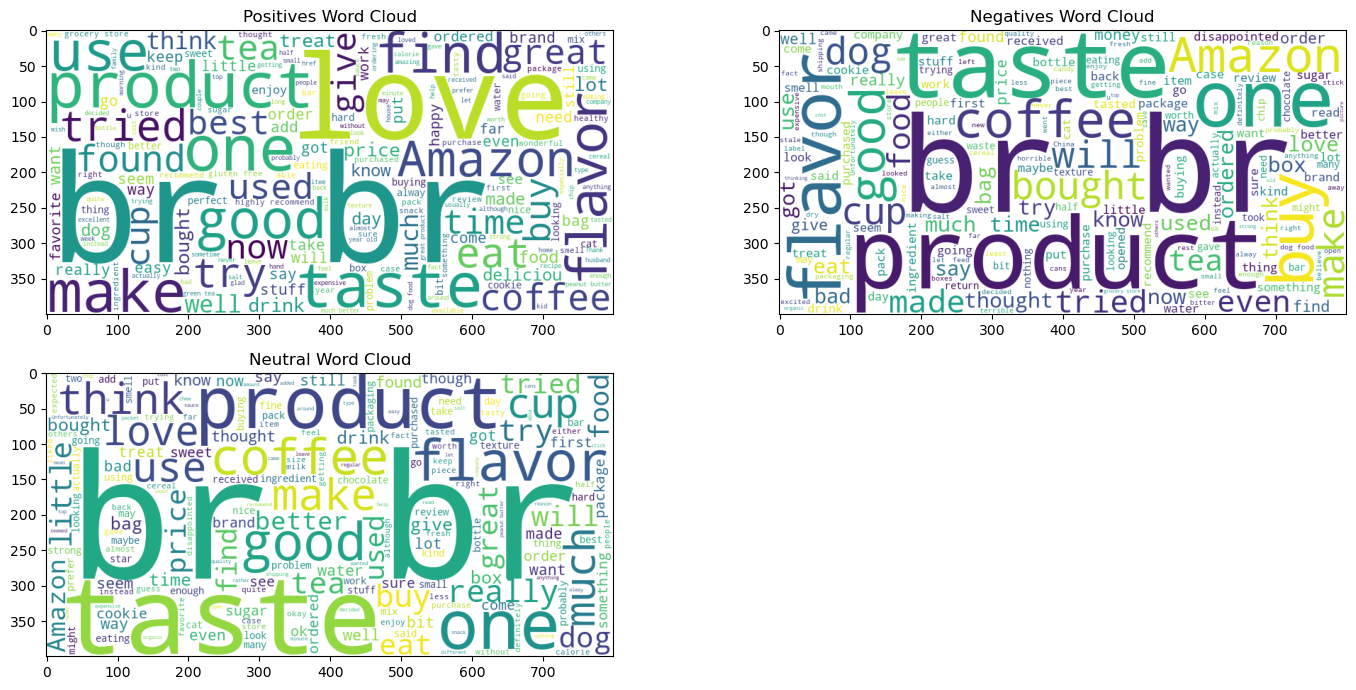

In [83]:
# Wordcloud
from wordcloud import WordCloud

positives_text = ' '.join(df[df['Sentiment']=='Positive']['ReviewText'].values)
positive_text_word_cloud = WordCloud(width=800,height=400,background_color='white').generate(positives_text)

negatives_text = ' '.join(df[df['Sentiment']=='Negative']['ReviewText'].values)
negative_text_word_cloud = WordCloud(width=800,height=400,background_color='white').generate(negatives_text)

neutrals_text = ' '.join(df[df['Sentiment']=='Neutral']['ReviewText'].values)
neutral_text_word_cloud = WordCloud(width=800,height=400,background_color='white').generate(neutrals_text)

fig,ax=plt.subplots(2,2,figsize=(15,7))
ax=ax.flatten()

ax[0].imshow(positive_text_word_cloud)
ax[0].set_title("Positives Word Cloud")

ax[1].imshow(negative_text_word_cloud)
ax[1].set_title("Negatives Word Cloud")

ax[2].imshow(neutral_text_word_cloud)
ax[2].set_title('Neutral Word Cloud')

fig.delaxes(ax[3])
fig.tight_layout()
plt.show()

In this word cloud there are some most repeated words like 'br, taste, love, product, flavour, one, buy, found, coffee, make' etc. We need to remove these stop words.

## SPRINT 2 - Build a model


### Step-3  Segregate input and output

In [88]:
X=df[['ReviewText']]
y=df['Sentiment']
X.shape,y.shape

((568453, 1), (568453,))

### Step-4 Train Test split

In [91]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=7)

print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(426339, 1) (426339,)
(142114, 1) (142114,)


## Task A
### Step-5 Data Preprocessing

In [107]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#### Defining a function to clean the teext data

In [110]:
def clean(doc):
    regex="[^a-zA-Z.]"
    doc=re.sub(regex, ' ', doc)
    
    doc=doc.lower()
    
    tokens=nltk.word_tokenize(doc)
    
    stop_words=list(set(stopwords.words("english")))
    custom_stop_words = ['br','taste','product','love','flovour','one','buy','make']
    stop_words=stop_words+custom_stop_words
    
    filtered_token=[word for word in tokens if word  not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    lemmatizer_tokens = [lemmatizer.lemmatize(token) for token in filtered_token]
    
    return ' '.join(lemmatizer_tokens)

In [112]:
def tokenizer(doc):
    return nltk.word_tokenize(doc)

### Data Preparation on Train data

In [115]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(token_pattern = None,
                                 tokenizer = tokenizer,
                                 ngram_range=(1,1),
                                 lowercase=False,
                                 preprocessor = clean,
                                 stop_words=None)

X_train_transformed = bow_vectorizer.fit_transform(X_train['ReviewText'])

print("Shape:", X_train_transformed.shape)

Shape: (426339, 87592)


### Data Preparation on Test data

In [118]:
X_test_transformed=bow_vectorizer.transform(X_test['ReviewText'])
print("Shape :", X_test_transformed.shape)

Shape : (142114, 87592)


## Task B

### Model Building & Evaluation

### 1. Naive Baye's Classifier

In [122]:
import time

In [124]:
%%time
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
start_time=time.time()
nb_classifier.fit(X_train_transformed, y_train)
end_time=time.time()
nb_time=end_time-start_time

start_time=time.time()
y_test_predict = nb_classifier.predict(X_test_transformed)
end_time=time.time()
nb_predict_time=end_time-start_time

nb_score=metrics.accuracy_score(y_test,y_test_predict)
print("Naive Bayes Accuracy :", nb_score)

nb_f_score = metrics.f1_score(y_test,y_test_predict,average='weighted')
print("Naive Baye's f1-score :", nb_f_score)

Naive Bayes Accuracy : 0.8343724052521215
Naive Baye's f1-score : 0.8298065873668788
CPU times: total: 3.89 s
Wall time: 4.51 s


### 2. Logistic Regression

In [127]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_reg = LogisticRegression()
start_time=time.time()
logistic_reg.fit(X_train_transformed, y_train)
end_time=time.time()
lr_time=end_time-start_time

start_time=time.time()
y_test_predict = logistic_reg.predict(X_test_transformed)
end_time=time.time()
lr_predict_time=end_time-start_time

logistic_score=metrics.accuracy_score(y_test, y_test_predict)
print("Logistic Regression Accuracy:", logistic_score)

logistic_f_score=metrics.f1_score(y_test, y_test_predict,average='weighted')
print("Logistic Regression f1-score:",logistic_f_score)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.859781583798922
Logistic Regression f1-score: 0.8416948063709385
CPU times: total: 1min 36s
Wall time: 54 s


## 2. Show me the comparison of various ML models.

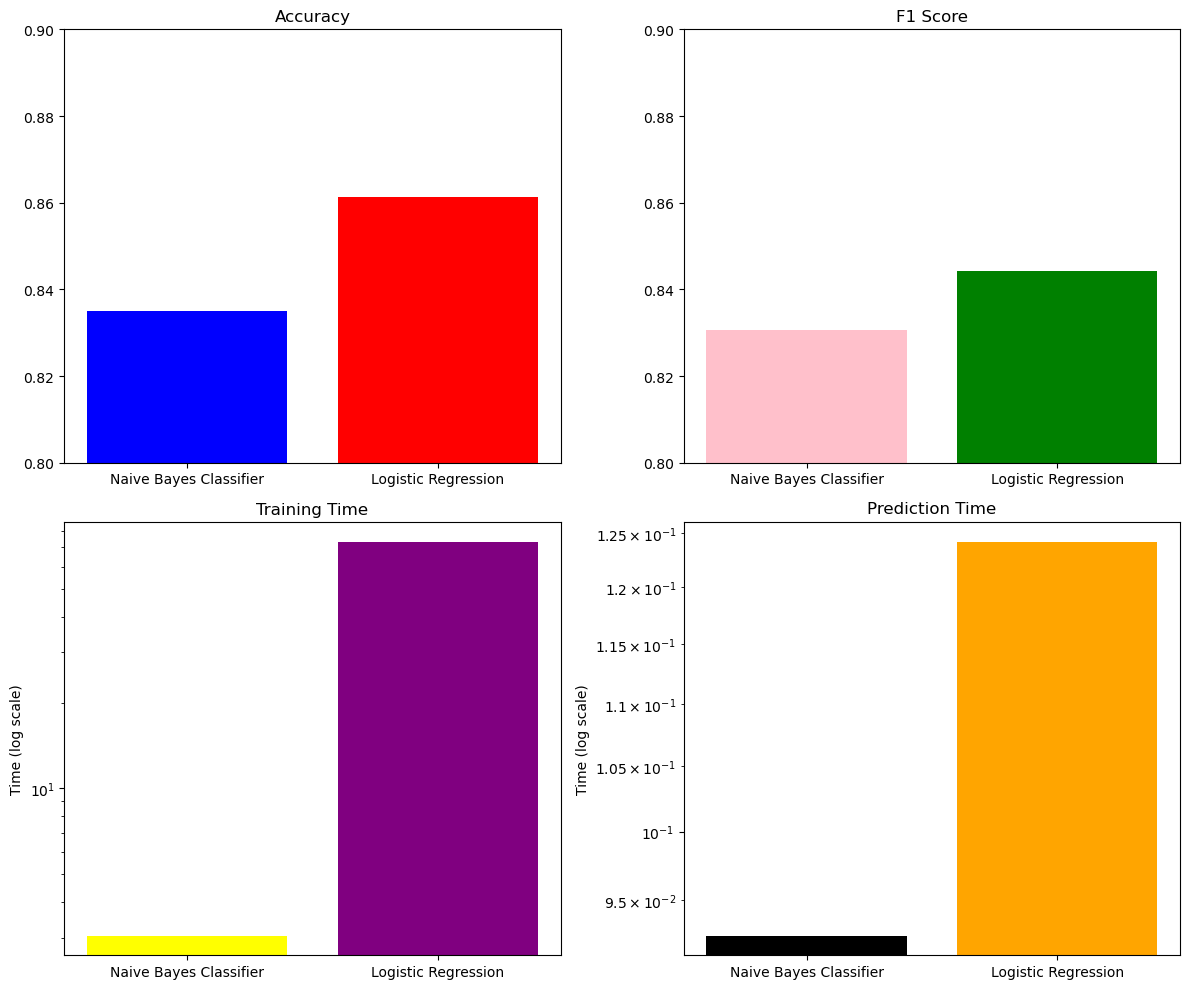

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Naive Bayes Classifier', 'Logistic Regression']
accuracy = [0.834942, 0.861224]
f1_score = [0.830586, 0.844282]
training_time = [3.048672, 73.403187]
prediction_time = [0.092530, 0.124183]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy
axs[0, 0].bar(models, accuracy, color=['blue', 'red'])
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim([0.8, 0.9])

# F1 Score
axs[0, 1].bar(models, f1_score, color=['pink', 'green'])
axs[0, 1].set_title('F1 Score')
axs[0, 1].set_ylim([0.8, 0.9])

# Training Time
axs[1, 0].bar(models, training_time, color=['yellow', 'purple'])
axs[1, 0].set_title('Training Time')
axs[1, 0].set_yscale('log')
axs[1, 0].set_ylabel('Time (log scale)')

# Prediction Time
axs[1, 1].bar(models, prediction_time, color=['black', 'orange'])
axs[1, 1].set_title('Prediction Time')
axs[1, 1].set_yscale('log')
axs[1, 1].set_ylabel('Time (log scale)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## 3. Model should be light for deployment.



Logistic Regression is giving more accuracy compared to Naive Bayes but it is taking more time

## 4. Model should have very less latency.

Naive Baye's Classifier (MultinomialNB) is building a model with very less latency with approximately 5.51 seconds.